In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as nb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error


In [2]:
## data load
df = pd.read_csv("flightpriceprediction.csv")

In [3]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,3/22/2025 1:10,2h 50m,non-stop,No info,3897
1,Air India,1/5/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,5:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/6/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,9:25,6/10/2025 4:25,19h,2 stops,No info,13882
3,IndiGo,12/5/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,1/3/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/4/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,8:20,11:20,3h,non-stop,No info,7229
10681,Vistara,1/3/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
df.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,3/22/2025 1:10,2h 50m,non-stop,No info,3897
1,Air India,1/5/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,5:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/6/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,9:25,6/10/2025 4:25,19h,2 stops,No info,13882
3,IndiGo,12/5/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,1/3/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/4/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,8:20,11:20,3h,non-stop,No info,7229
10681,Vistara,1/3/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/5/2019,Delhi,Cochin,DEL ? GOI ? BOM ? COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [6]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [7]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [10]:
df.duplicated

<bound method DataFrame.duplicated of            Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India        1/5/2019   Kolkata    Banglore   
2      Jet Airways        9/6/2019     Delhi      Cochin   
3           IndiGo       12/5/2019   Kolkata    Banglore   
4           IndiGo        1/3/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia        9/4/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara        1/3/2019  Banglore   New Delhi   
10682    Air India        9/5/2019     Delhi      Cochin   

                       Route Dep_Time    Arrival_Time Duration Total_Stops  \
0                  BLR ? DEL    22:20  3/22/2025 1:10   2h 50m    non-stop   
1      CCU ? IXR ? BBI ? BLR     5:50           13:15   7h 25m     2 stops   
2      

In [11]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [12]:
df['Route'] = df['Route'].fillna(df['Route'].mode()[0])




In [13]:
df.isnull()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
10678,False,False,False,False,False,False,False,False,False,False,False
10679,False,False,False,False,False,False,False,False,False,False,False
10680,False,False,False,False,False,False,False,False,False,False,False
10681,False,False,False,False,False,False,False,False,False,False,False


In [14]:
df.fillna({'Total_Stops': df['Total_Stops'].mode()[0]}, inplace=True)


In [15]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [16]:
# # Drop unnecessary columns
df.drop(['Route', 'Additional_Info', 'Date_of_Journey', 'Dep_Time', 'Arrival_Time'], axis=1, inplace=True)

In [17]:
# : Convert Duration to Minutes
def convert_duration(x):
    x = x.replace('h', '*60').replace('m', '').replace(' ', '+')
    return eval(x)

df['Duration_mins'] = df['Duration'].apply(convert_duration)
df.drop('Duration', axis=1, inplace=True)


In [18]:
# Encode Categorical Columns
le = LabelEncoder()
for col in ['Airline', 'Source', 'Destination', 'Total_Stops']:
    df[col] = le.fit_transform(df[col])


In [19]:
print(df.columns)



Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'Duration_mins'],
      dtype='object')


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# Assume df is your DataFrame
# Step 1: One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=['Airline', 'Source', 'Destination'], drop_first=True)

# Step 2: Define features and target
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

# Step 3: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
print("✅ Model Trained Successfully!")
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


✅ Model Trained Successfully!
R² Score: 0.5605593961322533
MAE: 2134.3370729574594


## Visualization

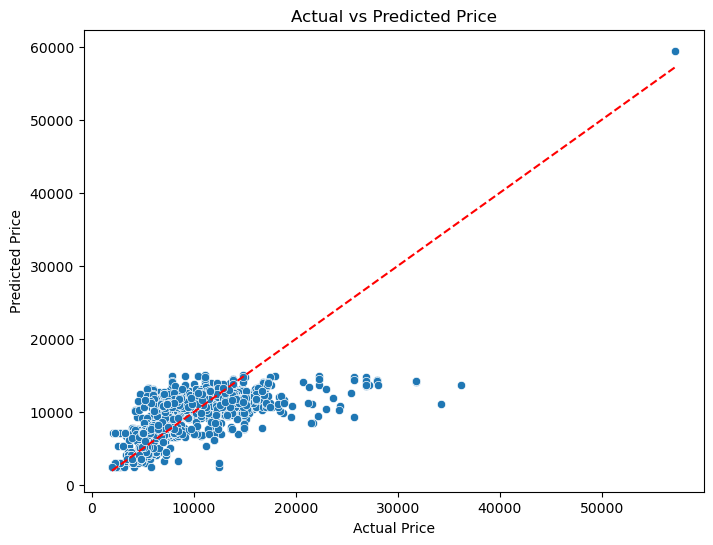

In [21]:
# 1️⃣ Actual vs Predicted Prices
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect prediction line
plt.show()

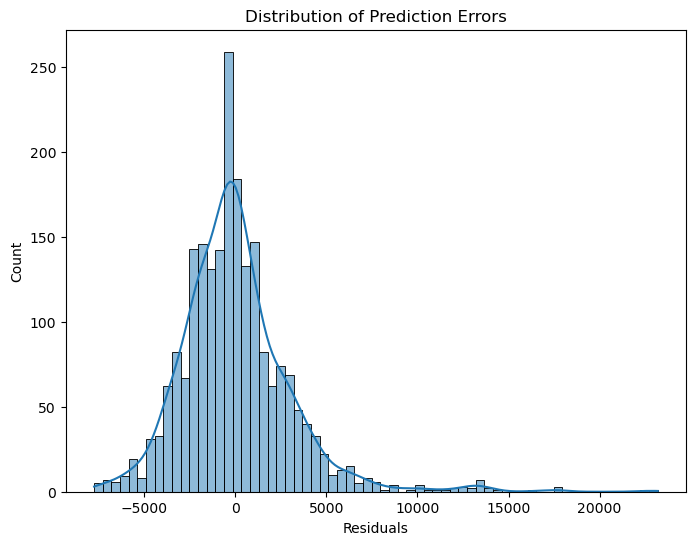

In [22]:
# 2️⃣ Residuals (Errors) plot
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.title("Distribution of Prediction Errors")
plt.show()

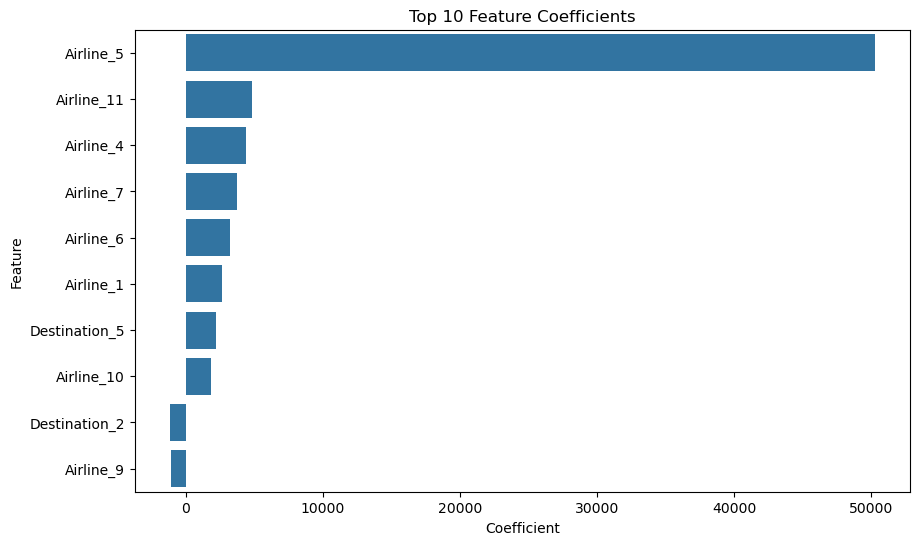

In [23]:
# 3️⃣ Feature importance (coefficients)
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coef_df = coef_df.sort_values(by='Coefficient', key=abs, ascending=False).head(10)  # top 10 features

plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title("Top 10 Feature Coefficients")
plt.show()


## To build a machine learning model that can accurately predict the price of airline tickets based on various factors such as Airline, Source, Destination, Total Stops, and Flight Duration, helping users or businesses make informed decisions about pricing, planning, and analysis.